<a href="https://colab.research.google.com/github/AkarshAnilkumar/Machine_Learning/blob/main/Tensorflow_model_for_Fruit_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


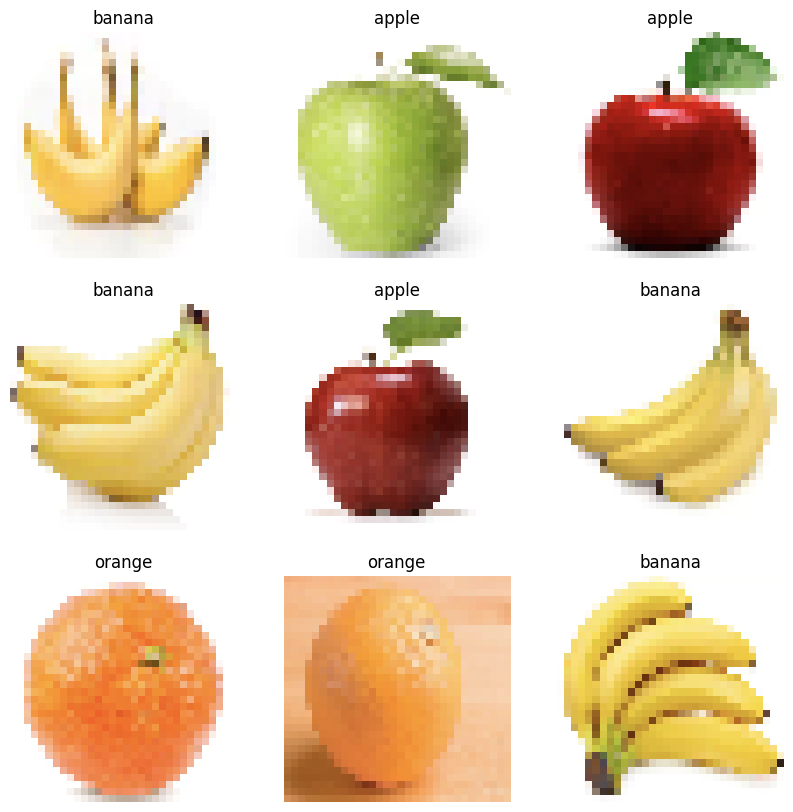

In [5]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [7]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [8]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 [==============================] - 13s 55ms/step - loss: 1.0204 - accuracy: 0.4848 - val_loss: 0.8835 - val_accuracy: 0.5303
Epoch 2/10
23/23 [==============================] - 2s 47ms/step - loss: 0.6512 - accuracy: 0.7326 - val_loss: 0.6573 - val_accuracy: 0.6515
Epoch 3/10
23/23 [==============================] - 2s 47ms/step - loss: 0.4052 - accuracy: 0.8283 - val_loss: 0.4336 - val_accuracy: 0.7879
Epoch 4/10
23/23 [==============================] - 2s 46ms/step - loss: 0.3361 - accuracy: 0.8522 - val_loss: 0.2265 - val_accuracy: 0.9242
Epoch 5/10
23/23 [==============================] - 2s 78ms/step - loss: 0.2419 - accuracy: 0.9022 - val_loss: 0.2547 - val_accuracy: 0.9091
Epoch 6/10
23/23 [==============================] - 2s 50ms/step - loss: 0.1599 - accuracy: 0.9370 - val_loss: 0.1788 - val_accuracy: 0.9394
Epoch 7/10
23/23 [==============================] - 2s 46ms/step - loss: 0.1269 - accuracy: 0.9500 - val_loss: 0.1762 - val_accuracy: 0.9242
Epoch 8/10
2

In [9]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 18ms/step - loss: 0.1716 - accuracy: 0.9462


[0.17157872021198273, 0.9461538195610046]

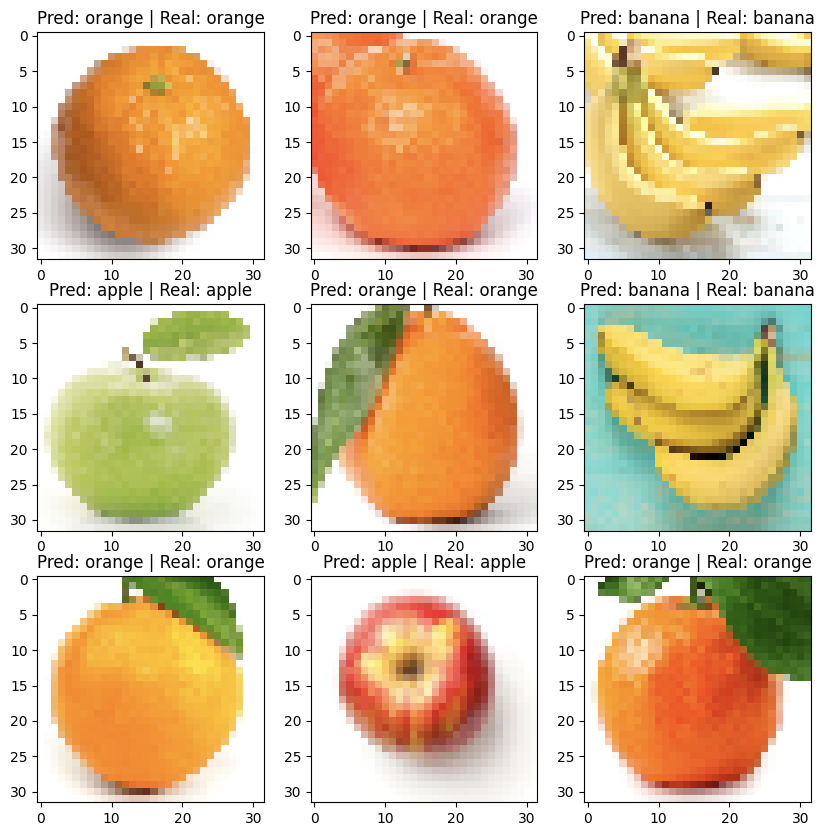

In [10]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)